In [1]:
import pandas as pd
import numpy as np
from pandas import json_normalize
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import json
import scipy.stats as stats
from scipy.stats import norm

In [2]:
df = pd.read_csv (r'users_file.csv',sep='\t')

In [3]:
df

,avatar_url,city,comments_count,country_code,created_at,description,first_name,followers,followers_count,followings,...,station_urn,track_count,uri,urn,user_albums,user_playlist_without_albums,user_top_tracks,user_tracks,username,verified
0,https://i1.sndcdn.com/avatars-000723723973-qtb...,NaN,0,FR,2016-10-12T22:04:43Z,NaN,NaN,235133933,3,"138934049,605567652,235133933,261197982,604286",...,soundcloud:system-playlists:artist-stations:26...,0,https://api.soundcloud.com/users/261128192,soundcloud:users:261128192,NaN,"314247842,593639301,321596631,266859227,296074...",NaN,NaN,adèle,False
1,https://i1.sndcdn.com/avatars-000507859965-mpc...,NaN,0,NaN,2017-10-16T15:41:53Z,NaN,NaN,NaN,0,"141687168,5603465,21113102,96841112,14830753,3...",...,soundcloud:system-playlists:artist-stations:33...,0,https://api.soundcloud.com/users/338315266,soundcloud:users:338315266,NaN,NaN,NaN,NaN,adele,False
2,https://i1.sndcdn.com/avatars-000270857665-bnc...,NaN,0,NaN,2016-05-18T09:17:14Z,NaN,NaN,NaN,3,267075468,...,soundcloud:system-playlists:artist-stations:22...,0,https://api.soundcloud.com/users/227758087,soundcloud:users:227758087,NaN,327168347,NaN,NaN,Adele,False
3,https://i1.sndcdn.com/avatars-000242997710-jw1...,NaN,0,NaN,2016-07-30T15:12:11Z,NaN,Adele,"459549,244431741",6,NaN,...,soundcloud:system-playlists:artist-stations:24...,0,https://api.soundcloud.com/users/244316169,soundcloud:users:244316169,NaN,NaN,NaN,NaN,Adele,False
4,https://a1.sndcdn.com/images/default_avatar_la...,NaN,0,NaN,2021-09-12T23:53:30Z,NaN,Аделина,NaN,0,NaN,...,soundcloud:system-playlists:artist-stations:10...,0,https://api.soundcloud.com/users/1029605386,soundcloud:users:1029605386,NaN,NaN,NaN,NaN,Adele,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3070,https://i1.sndcdn.com/avatars-001049708419-ld1...,NaN,0,NaN,2021-08-11T10:02:50Z,NaN,Siddharth,NaN,0,NaN,...,soundcloud:system-playlists:artist-stations:10...,0,https://api.soundcloud.com/users/1017825766,soundcloud:users:1017825766,NaN,NaN,NaN,NaN,Imagine Dragon,False
3071,https://a1.sndcdn.com/images/default_avatar_la...,NaN,0,NaN,2019-12-02T22:02:45Z,NaN,NaN,NaN,1,NaN,...,soundcloud:system-playlists:artist-stations:74...,0,https://api.soundcloud.com/users/743142379,soundcloud:users:743142379,NaN,NaN,NaN,NaN,imagine dragon,False
3072,https://a1.sndcdn.com/images/default_avatar_la...,NaN,0,NaN,2013-06-05T20:02:23Z,NaN,NaN,54274065,1,NaN,...,soundcloud:system-playlists:artist-stations:47...,0,https://api.soundcloud.com/users/47083503,soundcloud:users:47083503,NaN,NaN,NaN,NaN,imaginedragon_mus,False
3073,https://i1.sndcdn.com/avatars-000126195889-fqk...,NaN,0,NaN,2015-01-19T22:14:43Z,NaN,NaN,"339069036,116946423",2,"1807424,1078690,1301673,1546189,1722899,114782...",...,soundcloud:system-playlists:artist-stations:13...,0,https://api.soundcloud.com/users/133948403,soundcloud:users:133948403,NaN,954351964,NaN,NaN,imagine12dragon,False


In [4]:
df['created_at'] = pd.to_datetime(df['created_at']) # convert string data to datetime object
df['created_at']

0      2016-10-12 22:04:43+00:00
1      2017-10-16 15:41:53+00:00
2      2016-05-18 09:17:14+00:00
3      2016-07-30 15:12:11+00:00
4      2021-09-12 23:53:30+00:00
                  ...           
3070   2021-08-11 10:02:50+00:00
3071   2019-12-02 22:02:45+00:00
3072   2013-06-05 20:02:23+00:00
3073   2015-01-19 22:14:43+00:00
3074   2021-08-10 11:11:26+00:00
Name: created_at, Length: 3075, dtype: datetime64[ns, UTC]

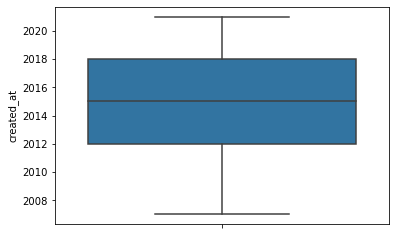

In [5]:
sns.boxplot(y=df['created_at'].dt.year);
plt.show()

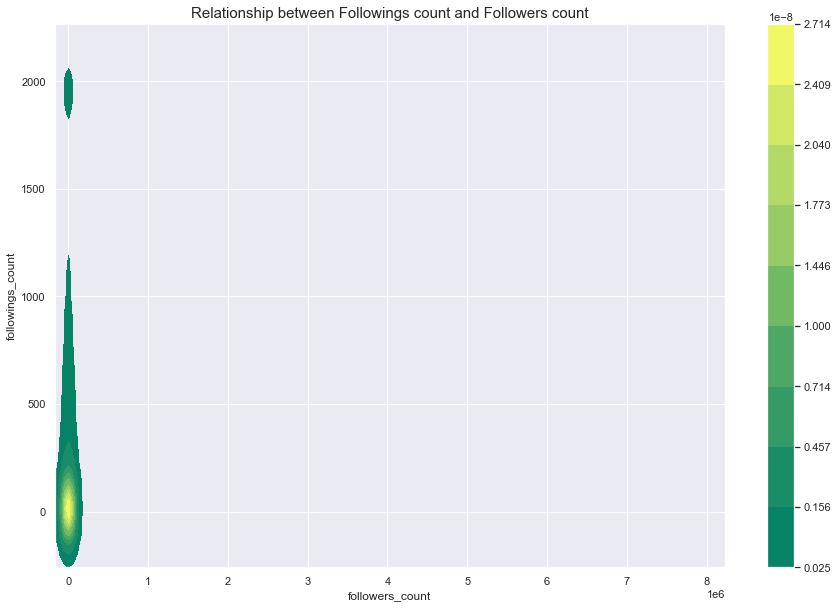

In [6]:
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.kdeplot(data=df,x = 'followers_count',y = 'followings_count',color='blue', shade=True,cmap="summer",cbar=True)
ax.set_title("Relationship between Followings count and Followers count",size = 15);

In [7]:
df = pd.read_csv (r'playlists_file.csv',sep='\t')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7013 entries, 0 to 7012
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artwork_url       2691 non-null   object 
 1   created_at        7013 non-null   object 
 2   description       1610 non-null   object 
 3   display_date      7013 non-null   object 
 4   duration          7013 non-null   int64  
 5   embeddable_by     7013 non-null   object 
 6   genre             2768 non-null   object 
 7   id                7013 non-null   int64  
 8   is_album          7013 non-null   bool   
 9   kind              7013 non-null   object 
 10  label_name        482 non-null    object 
 11  last_modified     7013 non-null   object 
 12  license           7013 non-null   object 
 13  likers            3610 non-null   object 
 14  likes_count       7013 non-null   int64  
 15  managed_by_feeds  7013 non-null   bool   
 16  permalink         7013 non-null   object 


In [9]:
df_corr = df[['likes_count','reposts_count','track_count']]

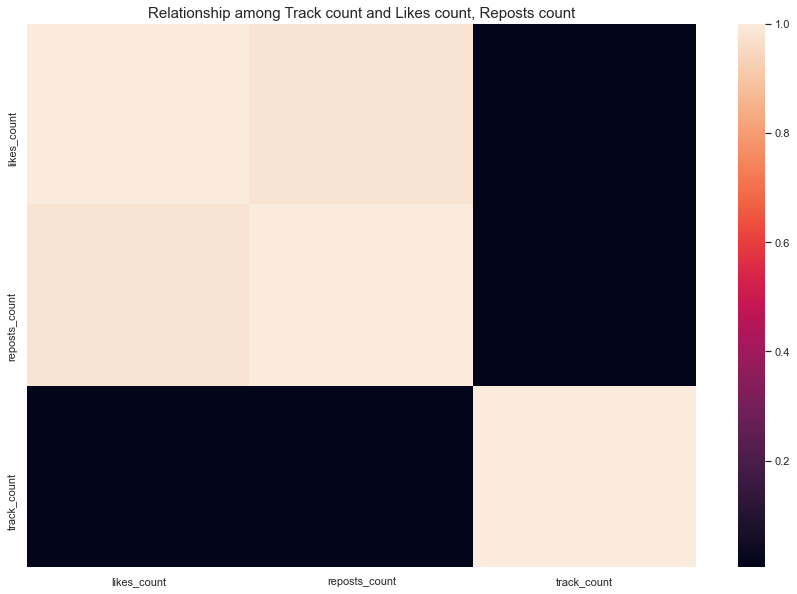

In [10]:
sns.heatmap(df_corr.corr())
sns.set(rc={'figure.figsize':(8,10)})
plt.title("Relationship among Track count and Likes count, Reposts count",size = 15)
plt.show()